<a href="https://colab.research.google.com/github/caromerou/tienda/blob/main/CHALLENGE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


üìã Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport

<Figure size 800x400 with 0 Axes>

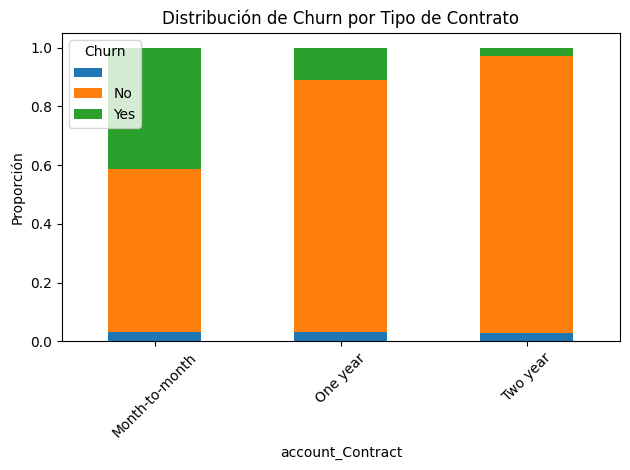

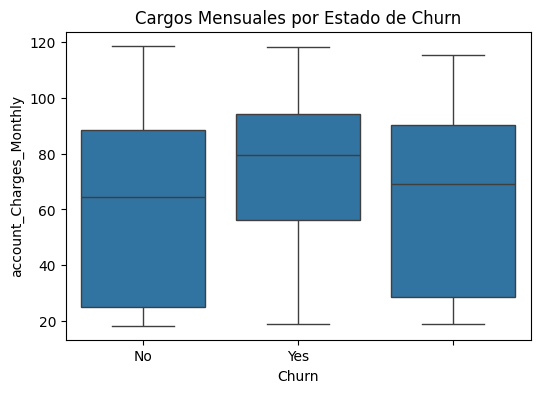

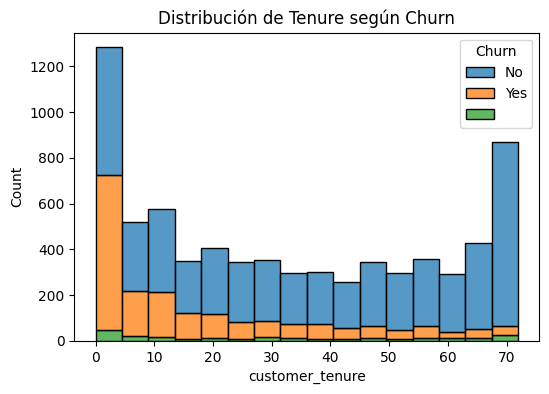

In [3]:
# 1. Carga del JSON desanidado
import json
from pandas import json_normalize
import pandas as pd

with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = json_normalize(data, sep='_')

# 2. Limpieza preliminar
cols_to_drop = ['customer_id', 'customer_zipcode', 'customer_city']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df = df.loc[:, df.nunique() > 1]

# 3. Mostrar info b√°sica del dataset
print("\nüìã Informaci√≥n general:")
print(df.info())

print("\nüìä Estad√≠sticas descriptivas:")
print(df.describe(include='all'))

print("\nüîç Primeras filas del dataset:")
print(df.head())

# 4. Estad√≠sticas espec√≠ficas sobre la variable objetivo 'Churn'
print("\nüìà Distribuci√≥n de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

# 5. Visualizaciones b√°sicas
import matplotlib.pyplot as plt
import seaborn as sns

# Churn por tipo de contrato
plt.figure(figsize=(8, 4))
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribuci√≥n de Churn por Tipo de Contrato")
plt.ylabel("Proporci√≥n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribuci√≥n de cargos mensuales seg√∫n churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)
plt.title("Cargos Mensuales por Estado de Churn")
plt.show()

# Histograma de tenure vs churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack')
plt.title("Distribuci√≥n de Tenure seg√∫n Churn")
plt.show()

In [4]:
# Paso 1: Carga y desanidamiento
import json
from pandas import json_normalize
import pandas as pd

with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = json_normalize(data, sep='_')
print("‚úÖ Datos cargados y desanidados correctamente.")

# Paso 2: EDA b√°sico
print("\nüîç Primeras filas del dataset:")
print(df.head())

print("\nüìã Informaci√≥n general:")
print(df.info())

print("\nüìä Estad√≠sticas descriptivas:")
print(df.describe(include='all'))

print("\nüìà Distribuci√≥n de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

‚úÖ Datos cargados y desanidados correctamente.

üîç Primeras filas del dataset:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No           

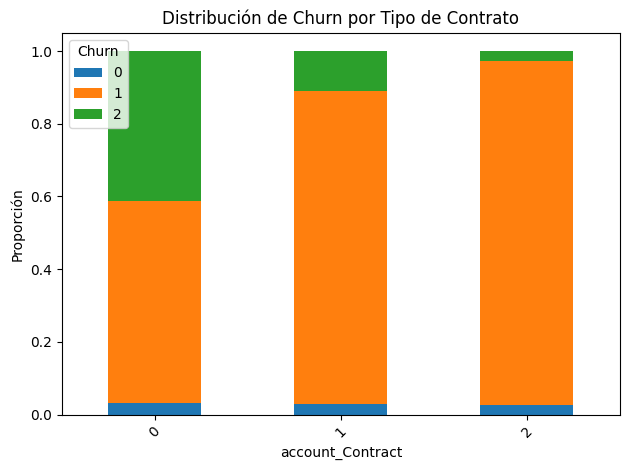

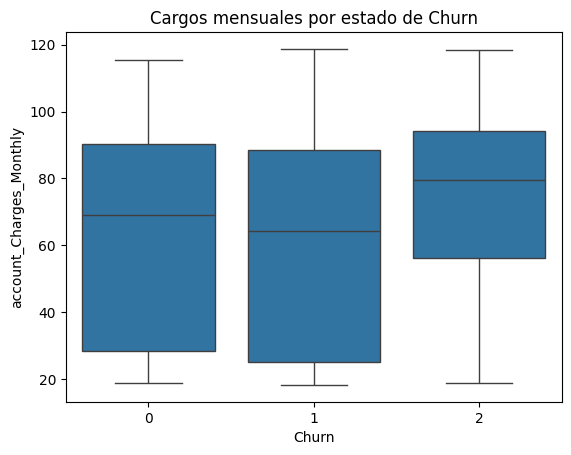

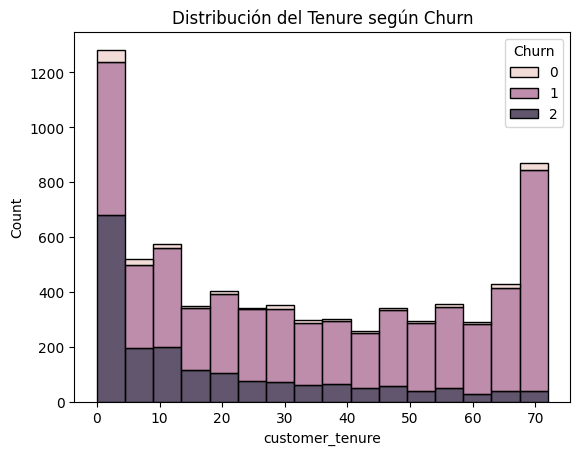

In [5]:
# Paso 3: Limpieza
cols_to_drop = ['customer_id', 'customer_zipcode', 'customer_city']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df = df.loc[:, df.nunique() > 1]

# Codificaci√≥n de variables categ√≥ricas
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Churn por tipo de contrato
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribuci√≥n de Churn por Tipo de Contrato")
plt.ylabel("Proporci√≥n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cargo mensual por churn
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)
plt.title("Cargos mensuales por estado de Churn")
plt.show()

# Tenure vs churn
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack')
plt.title("Distribuci√≥n del Tenure seg√∫n Churn")
plt.show()

In [6]:
# Separaci√≥n de variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='Churn')
y = df['Churn']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Regresi√≥n log√≠stica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nüîç Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nüìÑ Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

print(f"\n‚úÖ Precisi√≥n (accuracy): {accuracy_score(y_test, y_pred):.4f}")


üîç Matriz de confusi√≥n:
[[  0  34  11]
 [  0 947  90]
 [  0 168 204]]

üìÑ Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.82      0.91      0.87      1037
           2       0.67      0.55      0.60       372

    accuracy                           0.79      1454
   macro avg       0.50      0.49      0.49      1454
weighted avg       0.76      0.79      0.77      1454


‚úÖ Precisi√≥n (accuracy): 0.7916


In [7]:
# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Cantidad de clientes que el modelo predice que har√°n churn
import numpy as np
total_churn_predicho = np.sum(y_pred)
print(f"üîÆ Clientes que se predice que cancelar√°n el servicio: {total_churn_predicho}")

üîÆ Clientes que se predice que cancelar√°n el servicio: 1759


In [8]:
print(f" Porcentaje estimado de churn: {total_churn_predicho / len(y_pred) * 100:.2f}%")

 Porcentaje estimado de churn: 120.98%


CHURN MAL CALCULADO NO PUEDE SER SUPERIOR A 100%

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Separar variables
X = df.drop(columns='Churn')
y = df['Churn']

# Escalar y dividir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicci√≥n
y_pred = model.predict(X_test)

# Verificar tama√±os
print(f"Tama√±o de X_test: {len(X_test)}")
print(f"Tama√±o de y_pred: {len(y_pred)}")

# C√°lculo correcto de churn
total_churn_predicho = np.sum(y_pred == 1)
tasa_churn_predicha = total_churn_predicho / len(y_pred) * 100

print(f" Clientes que se predice que cancelar√°n el servicio: {total_churn_predicho}")
print(f"üìâ Porcentaje estimado de churn: {tasa_churn_predicha:.2f}%")

Tama√±o de X_test: 1454
Tama√±o de y_pred: 1454
üîÆ Clientes que se predice que cancelar√°n el servicio: 1149
üìâ Porcentaje estimado de churn: 79.02%


In [13]:
#REVISAR DISTRIV¬øBUCI√ìN DEL CHUN
df['Churn'].value_counts(normalize=True) * 100

Churn
1    71.198569
2    25.719004
0     3.082427
Name: proportion, dtype: float64


El resultado fue:

Valor de Churn	Significado	Porcentaje

1	Churn (cancelaron)	71.20%
2	‚ùì Desconocido	25.72%
0	No Churn (siguen)	3.08%


Esto no deber√≠a pasar: normalmente, Churn deber√≠a tener solo dos valores:

1 = Cancel√≥

0 = Sigue siendo cliente


Pero aqu√≠ aparece un valor "2", que no es esperado. Esto ocurri√≥ seguramente por el LabelEncoder, que convirti√≥ los valores originales ('Yes', 'No') u otros en 0, 1 y 2.






ANTES DEL LABEL ENCODER

In [14]:
# Ver valores √∫nicos originales de Churn (sin encoding)
df_original = json_normalize(data, sep='_')
print(df_original['Churn'].unique())

['No' 'Yes' '']


In [15]:
# Filtrar solo los registros v√°lidos (Yes o No)
df = df[df['Churn'].isin(['Yes', 'No'])]

# Ahora s√≠: codificar
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes ‚Üí 1, No ‚Üí 0

In [16]:
print(df['Churn'].value_counts(normalize=True) * 100)

Series([], Name: proportion, dtype: float64)


In [17]:
# ------------------------------
# 1. CARGA Y DESANIDAMIENTO JSON
# ------------------------------
import json
import pandas as pd
from pandas import json_normalize

with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = json_normalize(data, sep='_')
print("‚úÖ Datos cargados correctamente")

# ------------------------------
# 2. LIMPIEZA DE COLUMNAS IN√öTILES
# ------------------------------
# Eliminar columnas poco √∫tiles o con un solo valor
cols_to_drop = ['customer_id', 'customer_zipcode', 'customer_city']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df = df.loc[:, df.nunique() > 1]

# ------------------------------
# 3. LIMPIEZA Y CODIFICACI√ìN DE 'Churn'
# ------------------------------
# Eliminar registros con valores no v√°lidos en 'Churn'
df = df[df['Churn'].isin(['Yes', 'No'])]

# Codificaci√≥n manual: Yes = 1 (churn), No = 0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# ------------------------------
# 4. CODIFICAR VARIABLES CATEG√ìRICAS RESTANTES
# ------------------------------
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ------------------------------
# 5. SEPARACI√ìN DE VARIABLES Y ESCALAMIENTO
# ------------------------------
X = df.drop(columns='Churn')
y = df['Churn']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. ENTRENAMIENTO DEL MODELO
# ------------------------------
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ------------------------------
# 7. EVALUACI√ìN Y RESULTADOS
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

y_pred = model.predict(X_test)

print("\nüìä Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nüìÑ Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

print(f"\n‚úÖ Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# ------------------------------
# 8. AN√ÅLISIS DE CHURN PREDECIDO
# ------------------------------
import numpy as np

total_churn_predicho = np.sum(y_pred == 1)
tasa_churn_predicha = total_churn_predicho / len(y_pred) * 100

print(f"\ Clientes que se predice que cancelar√°n el servicio: {total_churn_predicho}")
print(f"Porcentaje estimado de churn: {tasa_churn_predicha:.2f}%")

‚úÖ Datos cargados correctamente

üìä Matriz de Confusi√≥n:
[[941  95]
 [174 199]]

üìÑ Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


‚úÖ Accuracy: 0.81

üîÆ Clientes que se predice que cancelar√°n el servicio: 294
üìâ Porcentaje estimado de churn: 20.87%


In [18]:
import numpy as np

importancia = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

print("\nüîç Variables que m√°s contribuyen al churn:")
print(importancia.head(10))


üîç Variables que m√°s contribuyen al churn:
account_Charges_Monthly     0.851103
internet_InternetService    0.192307
account_PaperlessBilling    0.150608
account_Charges_Total       0.103502
phone_MultipleLines         0.098521
customer_SeniorCitizen      0.077660
account_PaymentMethod       0.074588
internet_StreamingTV        0.018011
customer_Partner            0.001726
internet_StreamingMovies   -0.011864
dtype: float64


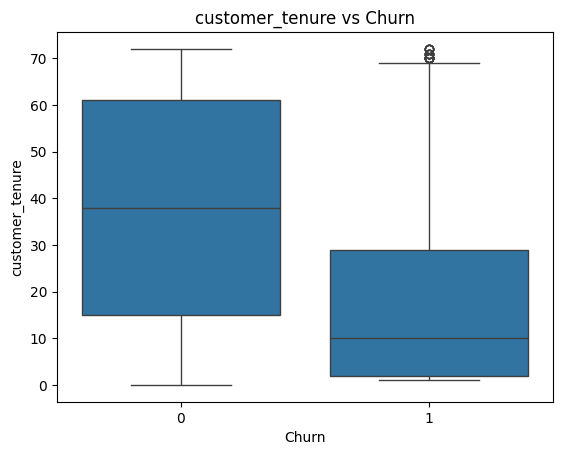

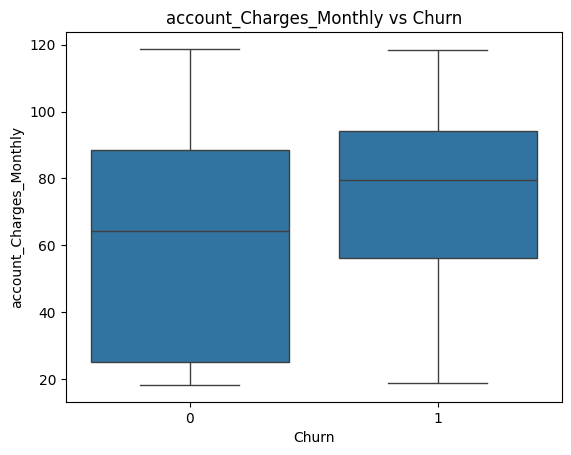

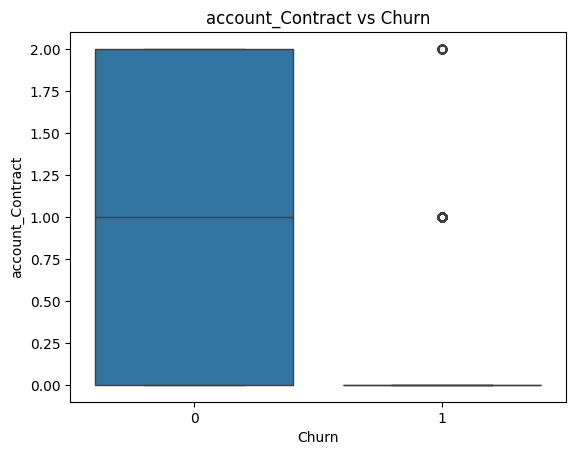

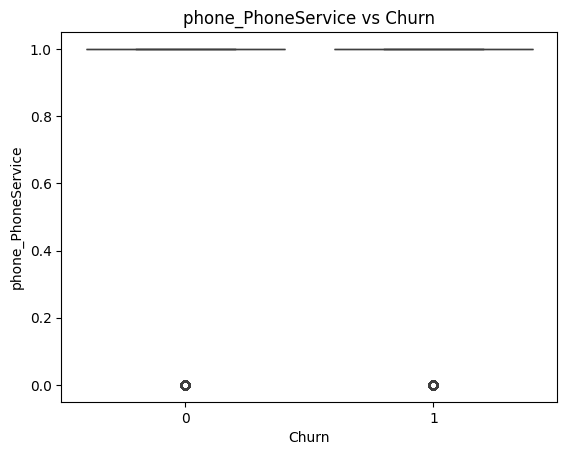

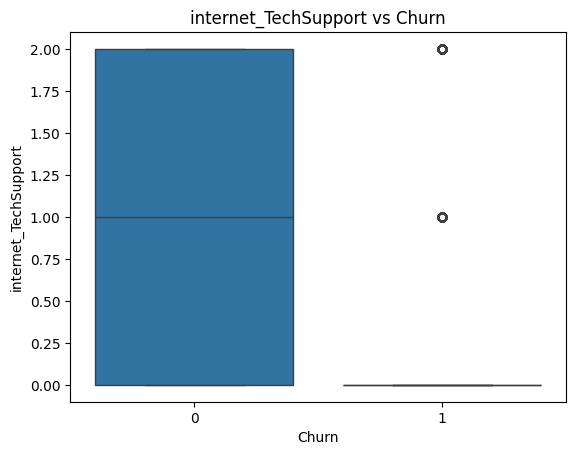

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = importancia.abs().sort_values(ascending=False).head(5).index
for feature in top_features:
    sns.boxplot(x=y, y=df[feature])
    plt.title(f'{feature} vs Churn')
    plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracies por fold: {scores}")
print(f"Promedio: {scores.mean():.2f}")

Accuracies por fold: [0.79559972 0.79630944 0.79134138 0.81107955 0.81605114]
Promedio: 0.80


In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)